<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/Open_ended_PitVQA_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download weights

In [ ]:
# download weights
!gdown --id 1qAPrVI0Eh7vFVkOoPEF8UGsYhZSXfO6F
!gdown --id 188-qVAHdscFJQL-lbk_JhlfCmNuQnATo
!gdown --id 11A2_zMSO0jCvF0vZARAWGVJi4VUV47Zd

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1qAPrVI0Eh7vFVkOoPEF8UGsYhZSXfO6F
From (redirected): https://drive.google.com/uc?id=1qAPrVI0Eh7vFVkOoPEF8UGsYhZSXfO6F&confirm=t&uuid=603c958c-2ca4-406f-97bb-5347b71cdb6d
To: /content/vec-mora-endo_Best.pth.tar
100% 3.38G/3.38G [00:46<00:00, 73.4MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=188-qVAHdscFJQL-lbk_JhlfCmNuQnATo
From (redirected): https://drive.google.com/uc?id=188-qVAHdscFJQL-lbk_JhlfCmNuQnATo&confirm=t&uuid=555cec5c-7e77-4148-bd76-e3b55c61f765
To: /conten

In [ ]:
# download model file
!gdown --id 1oDk9f1lg8XT_K9ngJy3yKlKorYY0wNTL

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1oDk9f1lg8XT_K9ngJy3yKlKorYY0wNTL
From (redirected): https://drive.google.com/uc?id=1oDk9f1lg8XT_K9ngJy3yKlKorYY0wNTL&confirm=t&uuid=3eb68630-abcc-4ae7-8f1c-915016c586ca
To: /content/model.py
100% 21.4k/21.4k [00:00<00:00, 48.6MB/s]


In [ ]:
# install libs
!pip install -q timm==0.9.12 fairscale==0.4.13 evaluate rouge_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.8 MB/s eta 0:00:00


### Utils

In [ ]:
# import libs
import os
import torch
import argparse
import torch.utils.data
import numpy as np
import random

from torch import nn
from torch.utils.data import DataLoader
from transformers import GPT2Tokenizer

from transformers import GPT2Tokenizer, GPT2LMHeadModel, BertTokenizer
from transformers import ViTModel, BlipConfig, BlipTextModel
from model import PitVQAGen
from model import VisualBertSentence

from nltk.translate.bleu_score import corpus_bleu

from PIL import Image
import torchvision.transforms as transforms
from torchvision.transforms.functional import InterpolationMode
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

def seed_everything(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

### Demo 1: PitVQA model + EndoVis-18-VQA dataset

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

Some weights of BlipTextModel were not initialized from the model checkpoint at Salesforce/blip-vqa-base and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.crossattention.output.LayerNorm.bias', 'encoder.layer.0.crossattention.output.LayerNorm.weight', 'encoder.layer.0.crossattention.output.dense.bias', 'encoder.layer.0.crossattention.output.dense.weight', 'encoder.layer.0.crossattention.self.

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Vector MoRA params initialized!
Downloading...
From: https://drive.google.com/uc?id=1Kg-dwCsKivNKubEPXWmOopuw91v3megC
To: /content/frame052.png
100% 1.44M/1.44M [00:00<00:00, 113MB/s]


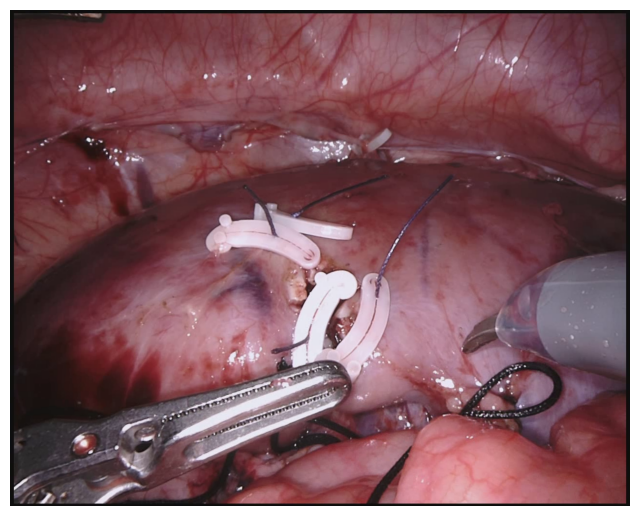

What organ is being operated?
true answer: organ being operated is kidney
pred answer:  being operated is kidney<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>
----------------------------------------------
What is the state of bipolar_forceps?
true answer: action done by bipolar forceps is idle
pred answer:  done by bipolar forceps is<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>
-------

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seed_everything(42)
seq_length = 32

# preapre model
model_path = '/content/vec-mora-endo_Best.pth.tar'
vector = [32, 32, 30, 30, 28, 28, 26, 26, 24, 24, 22, 22]

pit_model = PitVQAGen(base_rank=8, mora_rank_coefficients=vector)
checkpoint = torch.load(model_path, map_location='cpu')
pit_model = checkpoint['model']
pit_model.to(device)

# download demo images
!gdown 1Kg-dwCsKivNKubEPXWmOopuw91v3megC

# process image
transform = transforms.Compose([
       transforms.Resize((224, 224), interpolation=InterpolationMode.BICUBIC),
       transforms.ToTensor(),
       ])
raw_image = Image.open('frame052.png').convert('RGB')
image = transform(raw_image)
images = image.repeat(3, 1, 1, 1) # len(questions)=3

# plot image
plt.figure(figsize=(8, 8))
plt.imshow(raw_image)
plt.axis('off')
plt.show()

# prepare questions and answers
questions = ['what organ is being operated?',
       'what is the state of bipolar_forceps?',
       'where is monopolar_curved_scissors located?']

answers = ['organ being operated is kidney',
      'action done by bipolar forceps is idle',
      'monopolar curved scissors is located at right-top']

# define tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

# inference
pit_model.eval()
with torch.no_grad():
    question_inputs = tokenizer(questions, padding="max_length", max_length=seq_length, return_tensors="pt", truncation=True)
    logits = pit_model(image=images.to(device), question_inputs=question_inputs.to(device))

    _, predicted = torch.max(logits, dim=-1)
    predicted_answers = tokenizer.batch_decode(predicted, skip_special_tokens=False)

print('What organ is being operated?')
print(f'true answer: {answers[0]}')
print(f'pred answer: {predicted_answers[0]}')
print('----------------------------------------------')
print('What is the state of bipolar_forceps?')
print(f'true answer: {answers[1]}')
print(f'pred answer: {predicted_answers[1]}')
print('----------------------------------------------')
print('Where is monopolar_curved_scissors located?')
print(f'true answer: {answers[2]}')
print(f'pred answer: {predicted_answers[2]}')

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

Some weights of BlipTextModel were not initialized from the model checkpoint at Salesforce/blip-vqa-base and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.crossattention.output.LayerNorm.bias', 'encoder.layer.0.crossattention.output.LayerNorm.weight', 'encoder.layer.0.crossattention.output.dense.bias', 'encoder.layer.0.crossattention.output.dense.weight', 'encoder.layer.0.crossattention.self.

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Vector MoRA params initialized!
Downloading...
From: https://drive.google.com/uc?id=1BqQGPrVe1OKFymp5TUB5javcIndmpcJY
To: /content/frame021.png
100% 1.69M/1.69M [00:00<00:00, 111MB/s]


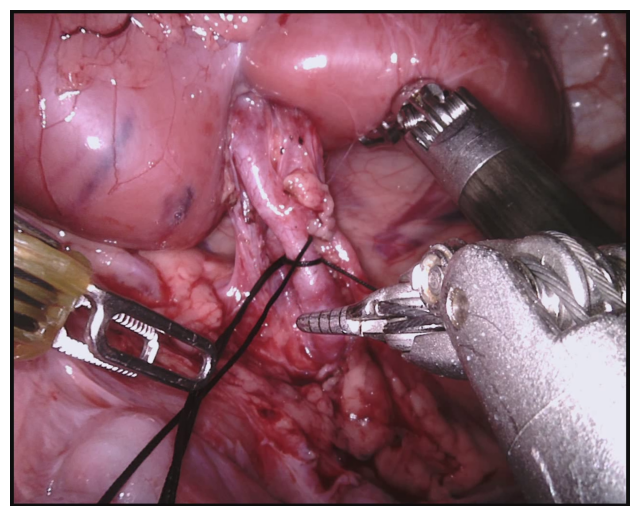

What is the state of bipolar forceps?
true answer: action done by bipolar forceps is looping
pred answer:  done by bipolar forceps is looping<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>
----------------------------------------------
What is the state of prograsp forceps?
true answer: action done by prograsp forceps is tissue manipulation
pred answer:  done by prograsp forceps is tissue manipulation<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>
--------------------------------------------

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seed_everything(42)
seq_length = 32

# preapre model
model_path = '/content/vec-mora-endo_Best.pth.tar'
vector = [32, 32, 30, 30, 28, 28, 26, 26, 24, 24, 22, 22]

pit_model = PitVQAGen(base_rank=8, mora_rank_coefficients=vector)
checkpoint = torch.load(model_path, map_location='cpu')
pit_model = checkpoint['model']
pit_model.to(device)

# download demo images
!gdown 1BqQGPrVe1OKFymp5TUB5javcIndmpcJY

# process image
transform = transforms.Compose([
       transforms.Resize((224, 224), interpolation=InterpolationMode.BICUBIC),
       transforms.ToTensor(),
       ])
raw_image = Image.open('frame021.png').convert('RGB')
image = transform(raw_image)
images = image.repeat(3, 1, 1, 1) # len(questions)=3

# plot image
plt.figure(figsize=(8, 8))
plt.imshow(raw_image)
plt.axis('off')
plt.show()

# prepare questions and answers
questions = ['what is the state of bipolar forceps?',
       'what is the state of prograsp forceps?',
       'where is prograsp forceps located?']

answers = ['action done by bipolar forceps is looping',
      'action done by prograsp forceps is tissue manipulation',
      'prograsp forceps is located at right-top']

# define tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

# inference
pit_model.eval()
with torch.no_grad():
    question_inputs = tokenizer(questions, padding="max_length", max_length=seq_length, return_tensors="pt", truncation=True)
    logits = pit_model(image=images.to(device), question_inputs=question_inputs.to(device))

    _, predicted = torch.max(logits, dim=-1)
    predicted_answers = tokenizer.batch_decode(predicted, skip_special_tokens=False)

print('What is the state of bipolar forceps?')
print(f'true answer: {answers[0]}')
print(f'pred answer: {predicted_answers[0]}')
print('----------------------------------------------')
print('What is the state of prograsp forceps?')
print(f'true answer: {answers[1]}')
print(f'pred answer: {predicted_answers[1]}')
print('----------------------------------------------')
print('Where is prograsp forceps located?')
print(f'true answer: {answers[2]}')
print(f'pred answer: {predicted_answers[2]}')

### Demo 2: PitVQA model + PitVQA dataset

Some weights of BlipTextModel were not initialized from the model checkpoint at Salesforce/blip-vqa-base and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.crossattention.output.LayerNorm.bias', 'encoder.layer.0.crossattention.output.LayerNorm.weight', 'encoder.layer.0.crossattention.output.dense.bias', 'encoder.layer.0.crossattention.output.dense.weight', 'encoder.layer.0.crossattention.self.

Vector MoRA params initialized!
Downloading...
From: https://drive.google.com/uc?id=1-nA7I0c_8B0rLX282oheeg1gJFoNY7d4
To: /content/03436.png
100% 72.8k/72.8k [00:00<00:00, 53.9MB/s]


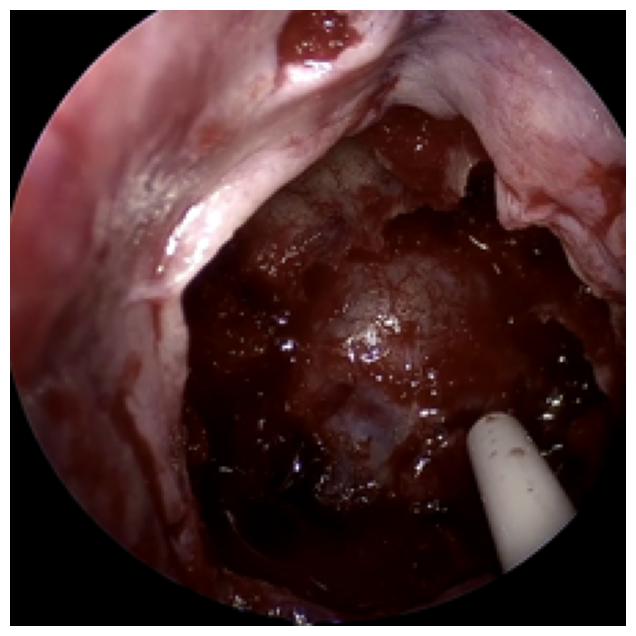

What is the surgical phase shown in the image?
true answer: the surgical phase shown in the image is closure
pred answer:  surgical phase shown in the image is closure
----------------------------------------------
What is the surgical step shown in the image?
true answer: the surgical step shown in the image is haemostasis
pred answer:  surgical step shown in the image is haemost
----------------------------------------------
What is the next surgical step?
true answer: the next surgical step is synthetic graft placement
pred answer:  next surgical step is synthetic graft placement
----------------------------------------------
What instrument is present in the bottom right of the image?
true answer: the instrument present in the bottom right of the image is micro doppler
pred answer:  instrument present in the bottom right of the image is micro do
----------------------------------------------
Where is the micro doppler located in the image?
true answer: the micro doppler is located 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seed_everything(42)
seq_length = 40

# preapre model
model_path = '/content/vec-mora-pit_Best.pth.tar'
vector = [32, 32, 30, 30, 28, 28, 26, 26, 24, 24, 22, 22]

pit_model = PitVQAGen(base_rank=8, mora_rank_coefficients=vector)
checkpoint = torch.load(model_path, map_location='cpu')
pit_model = checkpoint['model']
pit_model.to(device)

# download demo images
!gdown 1-nA7I0c_8B0rLX282oheeg1gJFoNY7d4

# process image
transform = transforms.Compose([
       transforms.Resize((224, 224), interpolation=InterpolationMode.BICUBIC),
       transforms.ToTensor(),
       ])
raw_image = Image.open('03436.png').convert('RGB')
image = transform(raw_image)
images = image.repeat(5, 1, 1, 1) # len(questions)=3

# plot image
plt.figure(figsize=(8, 8))
plt.imshow(raw_image)
plt.axis('off')
plt.show()

# prepare questions and answers
questions = ['what is the surgical phase shown in the image?',
       'what is the surgical step shown in the image?',
       'what is the next surgical step?',
       'what instrument is present in the bottom right of the image?',
       'where is the micro doppler located in the image?']

answers = ['the surgical phase shown in the image is closure',
      'the surgical step shown in the image is haemostasis',
      'the next surgical step is synthetic graft placement',
      'the instrument present in the bottom right of the image is micro doppler',
      'the micro doppler is located in the bottom right of the image']

# define tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

# inference
pit_model.eval()
with torch.no_grad():
    question_inputs = tokenizer(questions, padding="max_length", max_length=seq_length, return_tensors="pt", truncation=True)
    logits = pit_model(image=images.to(device), question_inputs=question_inputs.to(device))

    _, predicted = torch.max(logits, dim=-1)
    predicted_answers = tokenizer.batch_decode(predicted, skip_special_tokens=False)

print('What is the surgical phase shown in the image?')
print(f'true answer: {answers[0]}')
print(f'pred answer: {predicted_answers[0]}')
print('----------------------------------------------')
print('What is the surgical step shown in the image?')
print(f'true answer: {answers[1]}')
print(f'pred answer: {predicted_answers[1]}')
print('----------------------------------------------')
print('What is the next surgical step?')
print(f'true answer: {answers[2]}')
print(f'pred answer: {predicted_answers[2]}')
print('----------------------------------------------')
print('What instrument is present in the bottom right of the image?')
print(f'true answer: {answers[3]}')
print(f'pred answer: {predicted_answers[3]}')
print('----------------------------------------------')
print('Where is the micro doppler located in the image?')
print(f'true answer: {answers[4]}')
print(f'pred answer: {predicted_answers[4]}')

Some weights of BlipTextModel were not initialized from the model checkpoint at Salesforce/blip-vqa-base and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.crossattention.output.LayerNorm.bias', 'encoder.layer.0.crossattention.output.LayerNorm.weight', 'encoder.layer.0.crossattention.output.dense.bias', 'encoder.layer.0.crossattention.output.dense.weight', 'encoder.layer.0.crossattention.self.

Vector MoRA params initialized!
Downloading...
From: https://drive.google.com/uc?id=1iqgv0VC1lyNTQIIOg061dqKTzs-e00sh
To: /content/02153.png
100% 72.1k/72.1k [00:00<00:00, 80.6MB/s]


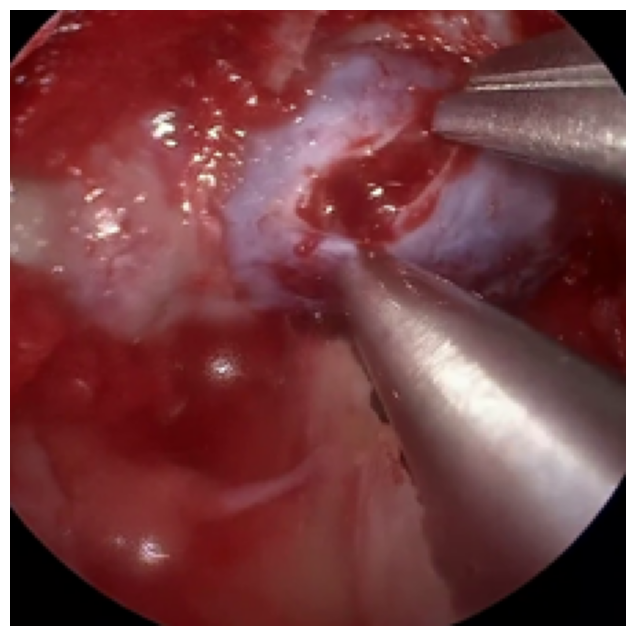

What is the surgical step shown in the image?
true answer: the surgical step shown in the image is durotomy
pred answer:  surgical step shown in the image is durot<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>
----------------------------------------------
What is the next surgical step?
true answer: the next surgical step is tumour excision
pred answer:  next surgical step is tumour exc<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endo

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seed_everything(42)
seq_length = 40

# preapre model
model_path = '/content/vec-mora-pit_Best.pth.tar'
vector = [32, 32, 30, 30, 28, 28, 26, 26, 24, 24, 22, 22]

pit_model = PitVQAGen(base_rank=8, mora_rank_coefficients=vector)
checkpoint = torch.load(model_path, map_location='cpu')
pit_model = checkpoint['model']
pit_model.to(device)

# download demo images
!gdown 1iqgv0VC1lyNTQIIOg061dqKTzs-e00sh

# process image
transform = transforms.Compose([
       transforms.Resize((224, 224), interpolation=InterpolationMode.BICUBIC),
       transforms.ToTensor(),
       ])
raw_image = Image.open('02153.png').convert('RGB')
image = transform(raw_image)
images = image.repeat(5, 1, 1, 1) # len(questions)=3

# plot image
plt.figure(figsize=(8, 8))
plt.imshow(raw_image)
plt.axis('off')
plt.show()

# prepare questions and answers
questions = ['what is the surgical step shown in the image?',
       'what is the next surgical step?',
       'what instrument is present in the top right of the image?',
       'what instrument is present in the center of the image?',
       'where is the dural scissors located in the image?']

answers = ['the surgical step shown in the image is durotomy',
      'the next surgical step is tumour excision',
      'the instrument present in the top right of the image is dural scissors',
      'the instrument present in the center of the image is suction',
      'the dural scissors is located in the top right of the image']

# define tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

# inference
pit_model.eval()
with torch.no_grad():
    question_inputs = tokenizer(questions, padding="max_length", max_length=seq_length, return_tensors="pt", truncation=True)
    logits = pit_model(image=images.to(device), question_inputs=question_inputs.to(device))

    _, predicted = torch.max(logits, dim=-1)
    predicted_answers = tokenizer.batch_decode(predicted, skip_special_tokens=False)

print('What is the surgical step shown in the image?')
print(f'true answer: {answers[0]}')
print(f'pred answer: {predicted_answers[0]}')
print('----------------------------------------------')
print('What is the next surgical step?')
print(f'true answer: {answers[1]}')
print(f'pred answer: {predicted_answers[1]}')
print('----------------------------------------------')
print('What instrument is present in the top right of the image?')
print(f'true answer: {answers[2]}')
print(f'pred answer: {predicted_answers[2]}')
print('----------------------------------------------')
print('What instrument is present in the center of the image?')
print(f'true answer: {answers[3]}')
print(f'pred answer: {predicted_answers[3]}')
print('----------------------------------------------')
print('Where is the dural scissors located in the image?')
print(f'true answer: {answers[4]}')
print(f'pred answer: {predicted_answers[4]}')

### Demo 3: VisualBert model + PitVQA dataset

Downloading...
From: https://drive.google.com/uc?id=1-nA7I0c_8B0rLX282oheeg1gJFoNY7d4
To: /content/03436.png
100% 72.8k/72.8k [00:00<00:00, 76.0MB/s]


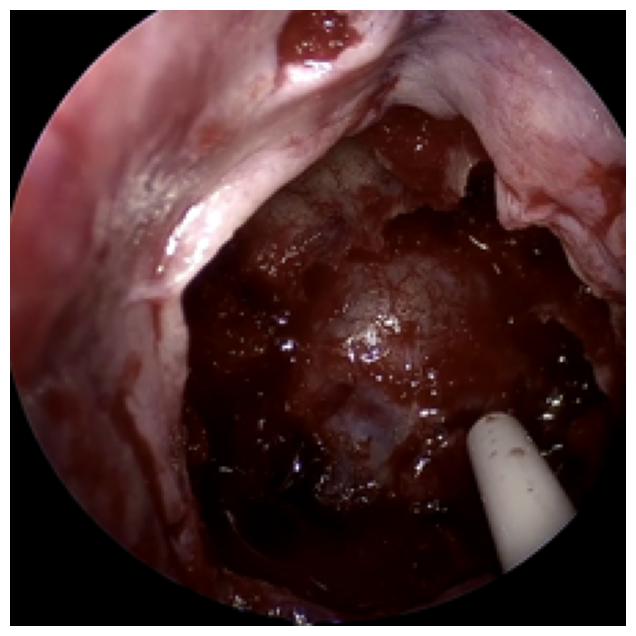

What is the surgical phase shown in the image?
true answer: the surgical phase shown in the image is closure
pred answer: the surgical surgical shown in the image is [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
----------------------------------------------
What is the surgical step shown in the image?
true answer: the surgical step shown in the image is haemostasis
pred answer: the surgical surgical shown in the image is [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
----------------------------------------------
What is the next surgical step?
true answer: the next surgical step is synthetic graft placement
pred answer: the surgical surgical shown in the image is [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seed_everything(42)
seq_length = 40

# preapre model
model_path = '/content/vb-2-pit_Best.pth.tar'

emb_dim = 300
encoder_layers = 6
decoder_layers = 6
dropout = 0.1
n_heads = 8

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
vb_model = VisualBertSentence(vocab_size=len(tokenizer), embed_dim=emb_dim, encoder_layers=encoder_layers,
                decoder_layers=decoder_layers, dropout=dropout, n_heads=n_heads, answer_len=seq_length)

checkpoint = torch.load(model_path, map_location='cpu')
vb_model = checkpoint['model']
vb_model.to(device)

# download demo images
!gdown 1-nA7I0c_8B0rLX282oheeg1gJFoNY7d4

# process image
transform = transforms.Compose([
       transforms.Resize((224, 224), interpolation=InterpolationMode.BICUBIC),
       transforms.ToTensor(),
       ])
raw_image = Image.open('03436.png').convert('RGB')
image = transform(raw_image)
images = image.repeat(5, 1, 1, 1) # len(questions)=3

# plot image
plt.figure(figsize=(8, 8))
plt.imshow(raw_image)
plt.axis('off')
plt.show()

# prepare questions and answers
questions = ['what is the surgical phase shown in the image?',
       'what is the surgical step shown in the image?',
       'what is the next surgical step?',
       'what instrument is present in the bottom right of the image?',
       'where is the micro doppler located in the image?']

answers = ['the surgical phase shown in the image is closure',
      'the surgical step shown in the image is haemostasis',
      'the next surgical step is synthetic graft placement',
      'the instrument present in the bottom right of the image is micro doppler',
      'the micro doppler is located in the bottom right of the image']

# inference
predicted_answers = []
vb_model.eval()
with torch.no_grad():
    for (img, question, answer) in zip(images, questions, answers):
        question_inputs = tokenizer(question, padding="max_length", max_length=seq_length, return_tensors="pt", truncation=True)
        answer_inputs = tokenizer(answer, padding="max_length", max_length=seq_length, return_tensors="pt", truncation=True)
        answers_GT_ID = answer_inputs.input_ids.to(device)
        answers_GT_len = torch.sum(answer_inputs.attention_mask, dim=1).unsqueeze(1).to(device)
        img = img.unsqueeze(0)

        logits, _, _, _, _ = vb_model(question_inputs, img, answers_GT_ID, answers_GT_len)
        _, predicted = torch.max(logits, dim=-1)
        predicted_answer = tokenizer.batch_decode(predicted, skip_special_tokens=False)
        predicted_answers.append(predicted_answer[0])

print('What is the surgical phase shown in the image?')
print(f'true answer: {answers[0]}')
print(f'pred answer: {predicted_answers[0]}')
print('----------------------------------------------')
print('What is the surgical step shown in the image?')
print(f'true answer: {answers[1]}')
print(f'pred answer: {predicted_answers[1]}')
print('----------------------------------------------')
print('What is the next surgical step?')
print(f'true answer: {answers[2]}')
print(f'pred answer: {predicted_answers[2]}')
print('----------------------------------------------')
print('What instrument is present in the bottom right of the image?')
print(f'true answer: {answers[3]}')
print(f'pred answer: {predicted_answers[3]}')
print('----------------------------------------------')
print('Where is the micro doppler located in the image?')
print(f'true answer: {answers[4]}')
print(f'pred answer: {predicted_answers[4]}')